<a href="https://colab.research.google.com/github/renzom1/Trabajo-Final-Simulaciones/blob/main/EvsV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [ ]:
# CARGA DE DATOS
# Volumen en angstrom por fórmula unidad:
V=np.array([1852.2347, 1939.0444,  2074.2795 ,2264.1770 ,2338.2715  ,2570.2181 ,2678.0456])
# Energía en Ry por fórmula unidad:
E=np.array([-1171.18076327 ,  -1171.43189155 , -1171.67945385 , -1171.80278148,  -1171.79729782 ,  -1171.64429925 , -1171.52194434])

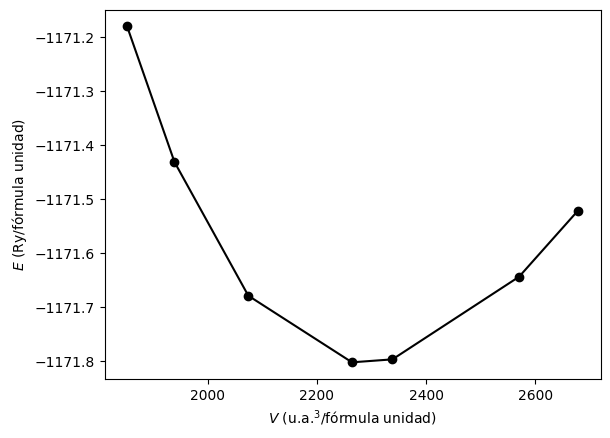

In [ ]:
# Visualización de los datos:
fig,ax=plt.subplots()
ax.errorbar(V, E, fmt="ko-") # Con este comando se instruye qué datos van en el eje x e y del gráfico. La llave "fmt" indica el formato de la línea.
#Llaves para que el eje y muestre números grandes
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
#Leyenda:
ax.set_xlabel("$V$ (u.a.$^3$/fórmula unidad)")
ax.set_ylabel("$E$ (Ry/fórmula unidad)")
plt.show()

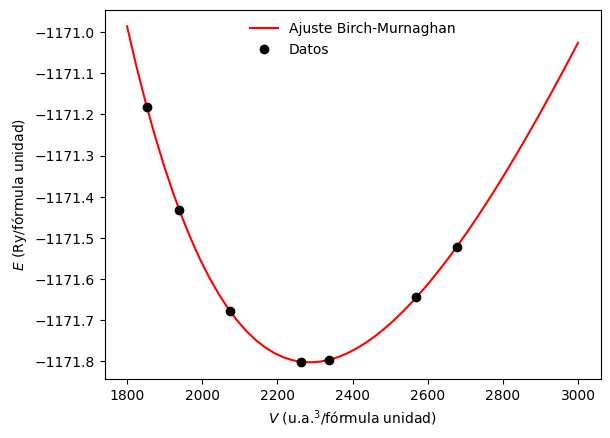

Parámetros del ajuste, E_0 (Ry), V0 (ua3), B0 (GPa) y B1 -1171.8035049210832 2286.1525218332863 159.33855242767734 3.802703342568014
Incertezas correspondientes: 0.0004716560038931498 0.5555769771867639 0.364730974994761 0.053378071978632737
R2: 0.9999944560303053


In [ ]:
# Ajuste y gráfico de resultados
# Definición de ec de estado de Birch-Murnaghan
def BM(x,E0,V0,B0,B1):
    BM = E0+(9/16)*(B0/14703.6)*V0*(((V0/x)**(2/3)-1)**3*B1+((V0/x)**(2/3)-1)**2*(6-4*(V0/x)**(2/3)))
    return BM

# Ajuste a los datos, proponiendo parámetros iniciales en p0
popt,cov=curve_fit(BM,xdata=V,ydata=E,p0=[-2300,4500,200,3])
perr=np.sqrt(np.diag(cov))
#popt tiene los parámetros optimizados del ajuste, y perr contiene los errores de los parámetros

# Se grafican los resultados:
fig,ax=plt.subplots()
plt.errorbar(V, E,fmt="ko", label="Datos")

# Para graficar la función ajustada, se fabrica un vector xrange que cubre el intervalo de valores de x de interés
xrange = np.linspace(1800, 3000, 50)
ax.plot(xrange,BM(xrange,*popt),color="r", label="Ajuste Birch-Murnaghan")


#Llaves para que el eje y muestre números grandes
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
#Leyenda:
ax.set_xlabel("$V$ (u.a.$^3$/fórmula unidad)")
ax.set_ylabel("$E$ (Ry/fórmula unidad)")
ax.legend(frameon=False)

plt.show()

# Finalmente se imprimen los parámetros del ajuste:
print("Parámetros del ajuste, E_0 (Ry), V0 (ua3), B0 (GPa) y B1", *popt)
print("Incertezas correspondientes:", *perr)
# Para sacar R^2 del ajuste:

x_data=V
y_data=E
r = y_data - BM(x_data, *popt) # Resta uno a uno (y guarda en un nuevo array) y_i con f(x_i) (evaluada en los parámetros que arrojó el ajuste)
SCR = np.sum(r**2) # Obtenemos la suma de los cuadrados de los residuos
SCT = np.sum((y_data - np.mean(y_data))**2) # Obtenemos la suma de los cuadrados totales
r_squared = 1-(SCR / SCT) # Calculamos R^2
print('R2:',r_squared)